In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#a = "flying fish flew by the space station"
#b = "he will not allow you to bring your sticks of dynamite and pet armadillo along"
#c = "he figured a few sticks of dynamite were easier than a fishing pole to catch an armadillo"

ta = "pet allow bring along"
tb = "he will not allow you to bring your sticks of dynamite and pet armadillo along"
tc = "he figured a few sticks of dynamite were easier than a fishing pole to catch an armadillo"

In [3]:
def shingle(text: str, k: int):
    shingle_set = []
    for i in range(len(text) - k+1):
        shingle_set.append(text[i:i+k])
    return set(shingle_set)

In [4]:
#create shingle with two characters each
k = 2
a = shingle(ta, k)
b = shingle(tb, k)
c = shingle(tc, k)
print(a)

{'on', 'et', 'al', 'ri', ' a', 'lo', 'pe', 'w ', 'g ', 't ', 'br', ' b', 'in', 'ng', 'ow', 'll'}


In [5]:
#concat all the shingles into one set
vocab = list(a.union(b).union(c))
print(vocab)

[' w', 'to', 'na', 'as', 'on', 'ri', 'mi', ' d', 'yo', ' e', 'ot', 'ca', 'st', 'dy', 'gu', 'po', ' f', 'te', 'ol', 'w ', 'hi', 'ks', 'nd', 'l ', ' a', 's ', 'is', 'ie', ' y', 'of', 'ng', 'er', 'ea', 'we', 'ti', 'h ', 'ow', 'al', 'ur', 'fi', 'th', 'no', ' s', 'sh', ' c', 'fe', 'an', 'ad', 'r ', 'si', 'yn', 'in', 'f ', 'ed', 'ou', 'll', 'et', 'am', 'g ', ' n', 'ic', ' o', ' p', 'at', 'lo', 'il', 'u ', 'd ', ' b', 'wi', 'it', 'ma', 'ig', 'pe', 'ew', 'a ', 'ar', 'e ', 'o ', ' t', 're', 'rm', 'le', 't ', 'br', 'tc', 'n ', 'he', 'di', 'ck', 'ch', 'ha']


In [6]:
#generate 1-hot for each data based on the shingles (vocab)
a_1hot = [1 if x in a else 0 for x in vocab]
b_1hot = [1 if x in b else 0 for x in vocab]
c_1hot = [1 if x in c else 0 for x in vocab]
print(len(a_1hot))
print(a_1hot)

92
[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]


In [7]:
#generate running numbers (hash) with the same total length as vocab
hash_ex = list(range(1, len(vocab)+1))
print(hash_ex)  # we haven't shuffled yet

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]


In [8]:
#shuffle the hash numbers
from random import shuffle

shuffle(hash_ex)
print(hash_ex)

[19, 7, 37, 9, 82, 65, 80, 39, 78, 43, 12, 1, 63, 45, 92, 54, 5, 73, 50, 85, 24, 51, 79, 28, 23, 72, 46, 77, 15, 70, 8, 14, 4, 32, 2, 83, 18, 17, 27, 89, 10, 6, 74, 52, 84, 33, 71, 88, 30, 3, 48, 41, 69, 29, 44, 35, 75, 87, 58, 90, 16, 67, 91, 62, 57, 81, 38, 11, 31, 20, 47, 21, 40, 56, 68, 25, 42, 53, 36, 61, 22, 26, 13, 76, 66, 86, 64, 49, 59, 55, 60, 34]


In [9]:
for i in range(1, 10):
    print(f"{i} -> {hash_ex.index(i)}")

1 -> 11
2 -> 34
3 -> 49
4 -> 32
5 -> 16
6 -> 41
7 -> 1
8 -> 30
9 -> 3


In [10]:
for i in range(1, len(vocab)+1):
    idx = hash_ex.index(i)
    signature_val = a_1hot[idx]
    print(f"{i} -> {idx} -> {signature_val}")
    if signature_val == 1:
        print('match!')
        break

1 -> 11 -> 0
2 -> 34 -> 0
3 -> 49 -> 0
4 -> 32 -> 0
5 -> 16 -> 0
6 -> 41 -> 0
7 -> 1 -> 0
8 -> 30 -> 1
match!


In [ ]:
hash_funcs = []

for _ in range(20):
    hash_ex = list(range(1, len(vocab)+1))
    shuffle(hash_ex)
    hash_funcs.append(hash_ex)

for i in range(3):
    print(f"hash function {i+1}:")
    print(hash_funcs[i])

In [ ]:
signature = []

for func in hash_funcs:
    for i in range(1, len(vocab)+1):
        idx = func.index(i)
        signature_val = a_1hot[idx]
        if signature_val == 1:
            signature.append(idx)
            break

#for each hash_func (20 in this case), get the index of the a_1hot where the value is 1
print(signature)

In [ ]:
#Combine all into one
def create_hash_func(size: int):
    # function for creating the hash vector/function
    hash_ex = list(range(1, size+1))
    shuffle(hash_ex)
    return hash_ex

def build_minhash_func(vocab_size: int, nbits: int):
    # function for building multiple minhash vectors
    hashes = []
    for _ in range(nbits):
        hashes.append(create_hash_func(vocab_size))
    return hashes

def create_hash(vector: list):
    # use this function for creating our signatures (eg the matching)
    signature = []
    for func in minhash_func:
        for i in range(1, len(vocab)+1):
            idx = func.index(i)
            signature_val = vector[idx]
            if signature_val == 1:
                signature.append(idx)
                break
    return signature

# we create 100 minhash vectors
minhash_func = build_minhash_func(len(vocab), 100)

In [ ]:
# now create signatures
a_sig = create_hash(a_1hot)
b_sig = create_hash(b_1hot)
c_sig = create_hash(c_1hot)

print(a_sig)
print(b_sig)
print(c_sig)

In [ ]:
def jaccard(a: set, b: set):
    return len(a.intersection(b)) / len(a.union(b))

In [ ]:
jaccard(a, b), jaccard(set(a_sig), set(b_sig))

In [ ]:
jaccard(a, c), jaccard(set(a_sig), set(c_sig))

In [ ]:
jaccard(b, c), jaccard(set(b_sig), set(c_sig))

**Locality Sensitive Hashing**
1) Divide our signature vectors into bands (sub-vectors)
2) Hash each of the sub-vectors into a set of buckets. If we found two sub-vectos from two different signatures hashed into the same buckets (collide), take the two full-signatures as candidate pairs
3) Compare the candidate pairs using Jaccard, Cosine, etc

We have to do:
1) Define the number of buckets (b)
2) Each bucket must contains the same number of rows (r)
3) The signature length must be divisible by b

In [ ]:
def split_vector(signature, b):
    assert len(signature) % b == 0
    r = int(len(signature) / b)
    # code splitting signature in b parts
    subvecs = []
    for i in range(0, len(signature), r):
        subvecs.append(signature[i : i+r])
    return subvecs

In [ ]:
band_b = split_vector(b_sig, 50) #10 bands, 2 rows
band_b

In [ ]:
band_c = split_vector(c_sig, 50)
band_c

In [ ]:
for b_rows, c_rows in zip(band_b, band_c):
    if b_rows == c_rows:
        print(f"Candidate pair: {b_rows} == {c_rows}")
        # we only need one band to match
        break

In [ ]:
band_a = split_vector(a_sig, 50)

In [ ]:
for a_rows, b_rows in zip(band_a, band_b):
    if a_rows == b_rows:
        print(f"Candidate pair: {a_rows} == {b_rows}")
        # we only need one band to match
        break

In [ ]:
for a_rows, c_rows in zip(band_a, band_c):
    if a_rows == c_rows:
        print(f"Candidate pair: {b_rows} == {c_rows}")
        # we only need one band to match
        break

**Tuning LSH**
<br>We can visualize the probability of returning a candidate pair vs the similarity of the pair for different values of r and b (rows and bands respectively) like so:

In [ ]:
def probability(s, r, b):
    # s: similarity
    # r: rows (per band)
    # b: number of bands
    return 1 - (1 - s**r)**b

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
results = pd.DataFrame({
    's': [],
    'P': [],
    'r,b': []
})

for s in np.arange(0.01, 1, 0.01):
    total = 100
    for b in [100, 50, 25, 20, 10, 5, 4, 2, 1]:
        r = int(total/b)
        P = probability(s, r, b)
        results = results.append({
            's': s,
            'P': P,
            'r,b': f"{r},{b}"
        }, ignore_index=True)
        
        
sns.lineplot(data=results, x='s', y='P', hue='r,b')

In [ ]:
a = [3, 4]
b = [4, 3]
if a == b: 
    print(True)
else:
    print(False)

<AxesSubplot:xlabel='Similarity (S)', ylabel='Probability (P)'>

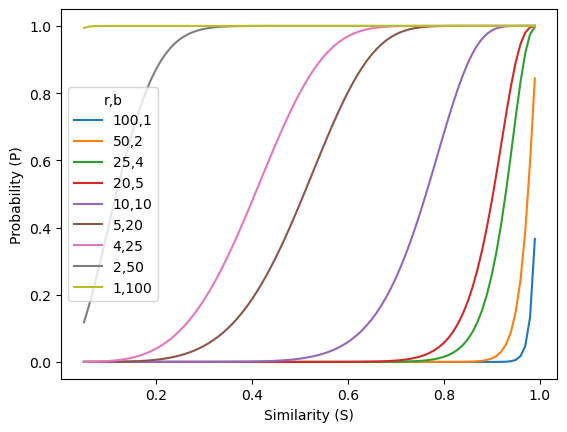

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

def probability(s, r, b):
    # s: similarity
    # r: rows (per band)
    # b: number of bands
    return 1 - (1 - s**r)**b

results = pd.DataFrame({
    's': [],
    'P': [],
    'r,b': []
})

total = 100

for s in np.arange(0.05, 1, 0.01):    
    factors = []
    for i in range(1, total+1):
        if total%i==0:
            factors.append(i)
    for b in factors:
        r = int(total/b)
        P = probability(s, r, b)
        results = results.append({
            'Similarity (S)': s,
            'Probability (P)': P,
            'r,b': f"{r},{b}"
        }, ignore_index=True)

sns.lineplot(data=results, x='Similarity (S)', y='Probability (P)', hue='r,b')

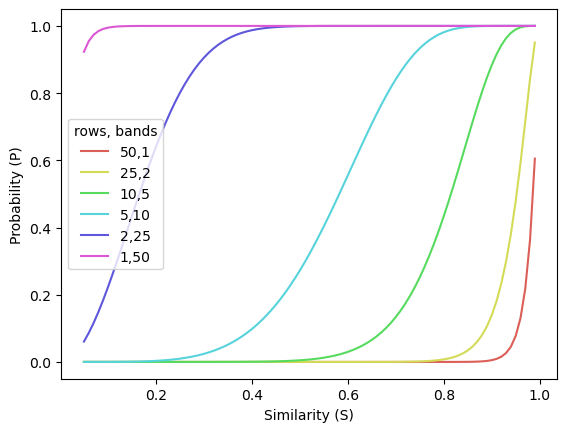

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

def probability(s, r, b):
    return 1 - (1 - s**r)**b

results = pd.DataFrame({
    'Similarity (S)': [],
    'Probability (P)': [],
    'r,b': []
})

total = 50

for s in np.arange(0.05, 1, 0.01):
    factors = []
    for i in range(1, total + 1):
        if total % i == 0:
            factors.append(i)
    for b in factors:
        r = int(total / b)
        P = probability(s, r, b)
        results = results.append({
            'Similarity (S)': s,
            'Probability (P)': P,
            'rows, bands': f"{r},{b}"
        }, ignore_index=True)

# Define a custom color palette
custom_palette = sns.color_palette("hls", n_colors=len(results['rows, bands'].unique()))

# Set the custom color palette
sns.set_palette(custom_palette)

sns.lineplot(data=results, x='Similarity (S)', y='Probability (P)', hue='rows, bands')
plt.show()

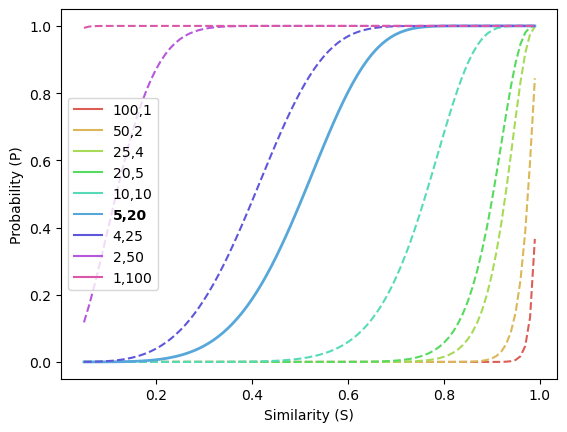

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

def probability(s, r, b):
    return 1 - (1 - s**r)**b

results = pd.DataFrame({
    'Similarity (S)': [],
    'Probability (P)': [],
    'rows, bands': []
})

total = 100

highlight_r, highlight_b = 5,20  # Row and band values to highlight

for s in np.arange(0.05, 1, 0.01):
    factors = []
    for i in range(1, total + 1):
        if total % i == 0:
            factors.append(i)
    for b in factors:
        r = int(total / b)
        P = probability(s, r, b)
        results = results.append({
            'Similarity (S)': s,
            'Probability (P)': P,
            'rows, bands': f"{r},{b}"
        }, ignore_index=True)

# Define a custom color palette
custom_palette = sns.color_palette("hls", n_colors=len(results['rows, bands'].unique()))

# Set the custom color palette
sns.set_palette(custom_palette)

# Create the line plot
ax = sns.lineplot(data=results, x='Similarity (S)', y='Probability (P)', hue='rows, bands')

# Find the index of the highlighted line
highlight_idx = results[results['rows, bands'] == f"{highlight_r},{highlight_b}"].index[0]

# Loop through legend labels and line handles to set line styles
for idx, (line, text) in enumerate(zip(ax.lines, ax.legend().get_texts())):
    if idx == highlight_idx:
        line.set_linewidth(2)  # Set highlighted line bolder
        text.set_fontweight('bold')  # Make highlighted legend label bold
    else:
        line.set_linestyle('--')  # Set other lines to dashed

plt.show()